## Course Announcements

**Due Dates**:
- Sun: D5, Q6, and (*optional*) Weekly Project Survey
- Wed: A3

**Notes**
- Proposal Feedback Coming Monday (~2PM)
- No 5PM or 6PM Section today
- There are surveys from your classmates pinned on Piazza - fill out if you have time!

## Course Announcements

**Due Sunday**:
- D5
- Q6
- Weekly Project Survey (*optional*)

**Due next Wed**:
- A3 (A4 will also be pushed back to Wed)

**Notes**
- Guest Lecture on Friday!
- Previous Project Review Scores/Feedback Posted
- [Discuss Checkpoint #1](https://github.com/COGS108/Projects/blob/wi24/FinalProject_Guidelines.md#checkpoint-1-data)
- No lecture, section, OH on Monday (Holiday)

# Inference: Linear Regression

- **simple linear regression**
    - effect size
    - p-value
    - interpretation
- **correlation**
- **multiple linear regression**
    - confounding
- **t-tests**

In [1]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

## The Question

Does Poverty Percentage affect Teen Birth Rate?

$H_o$: There is no relationship between poverty percentage and teen birth rate ($\beta = 0$)

$H_a$: There is a relationship between poverty percentage and teen birth rate ($\beta \ne 0$)

## The Data

In [2]:
# read in file; specify that it is tab-separated file
df = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/index.txt', sep='\t')
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


## Assumptions of Linear Regression

1. Linear relationship
2. No multicollinearity
3. No auto-correlation
4. Homoscedasticity

## Exploratory Plot

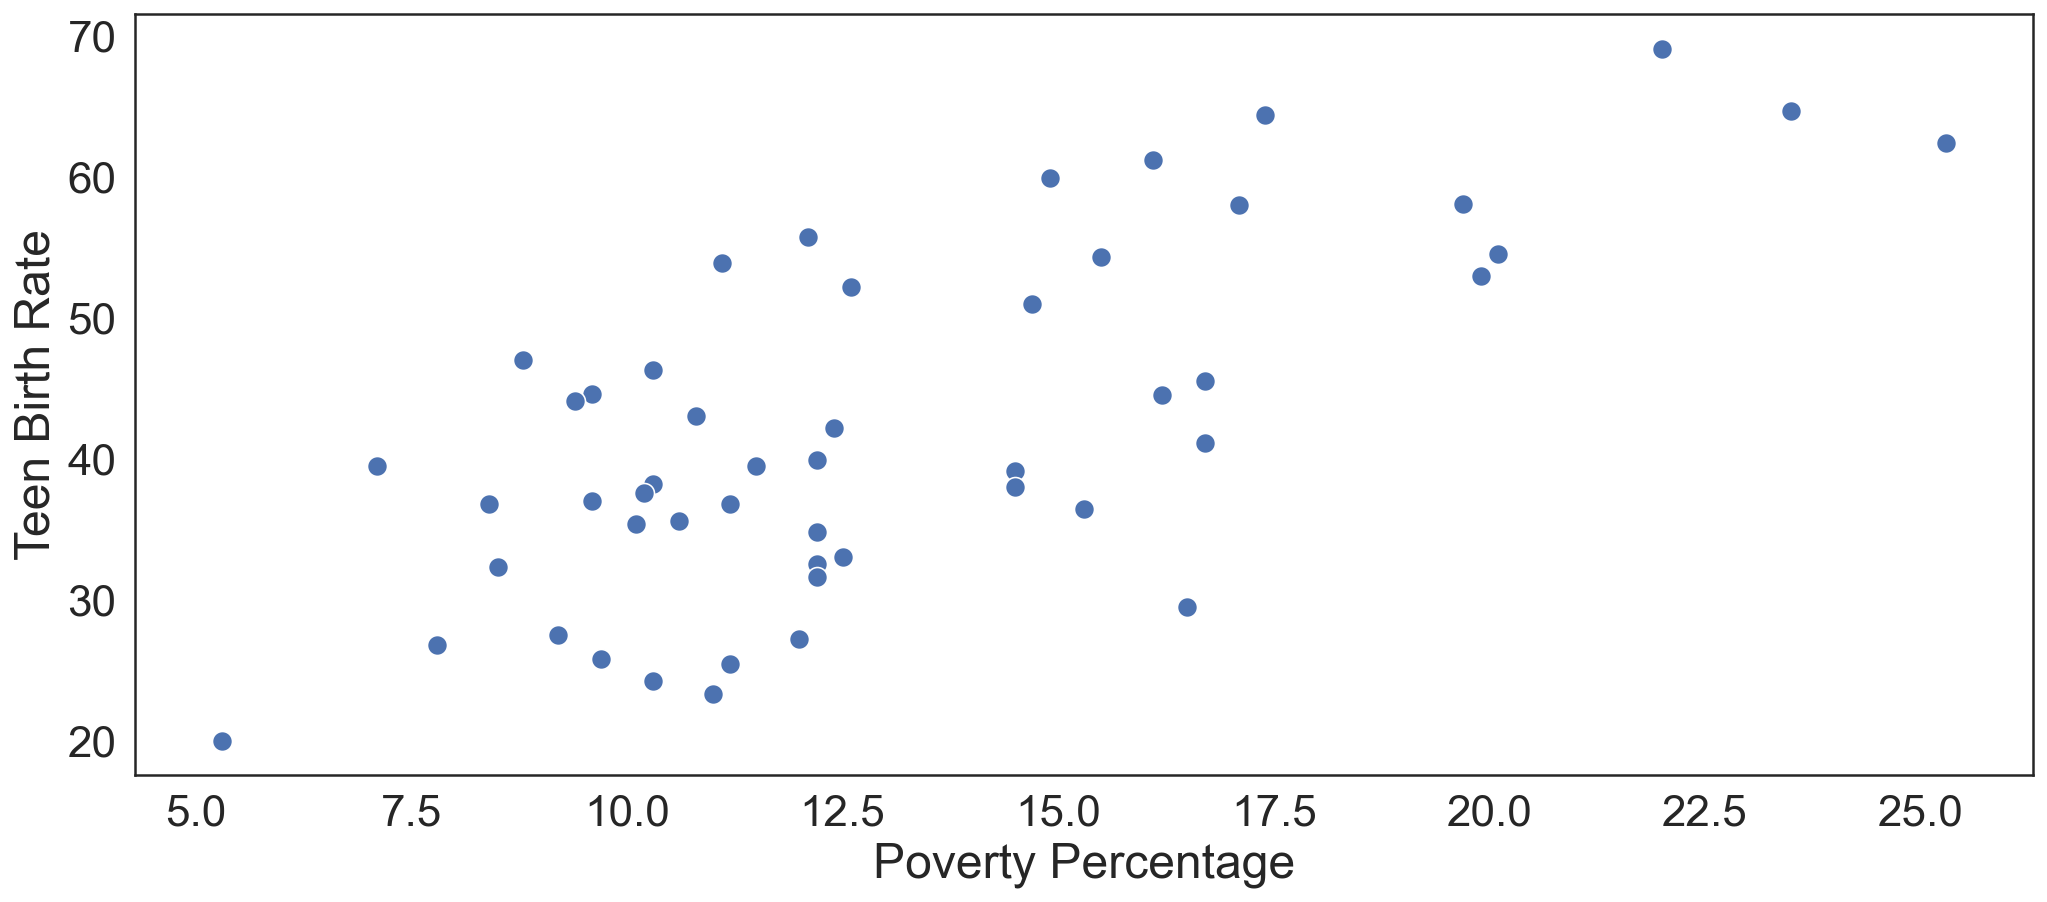

In [3]:
sns.scatterplot(x='PovPct', y='TeenBrth', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate');

We see there is some sort of relationship here, but we want to *measure that realtionship*. Given that the increase appears linear over time (Assumption #1), linear regreasssion allows us to do that.

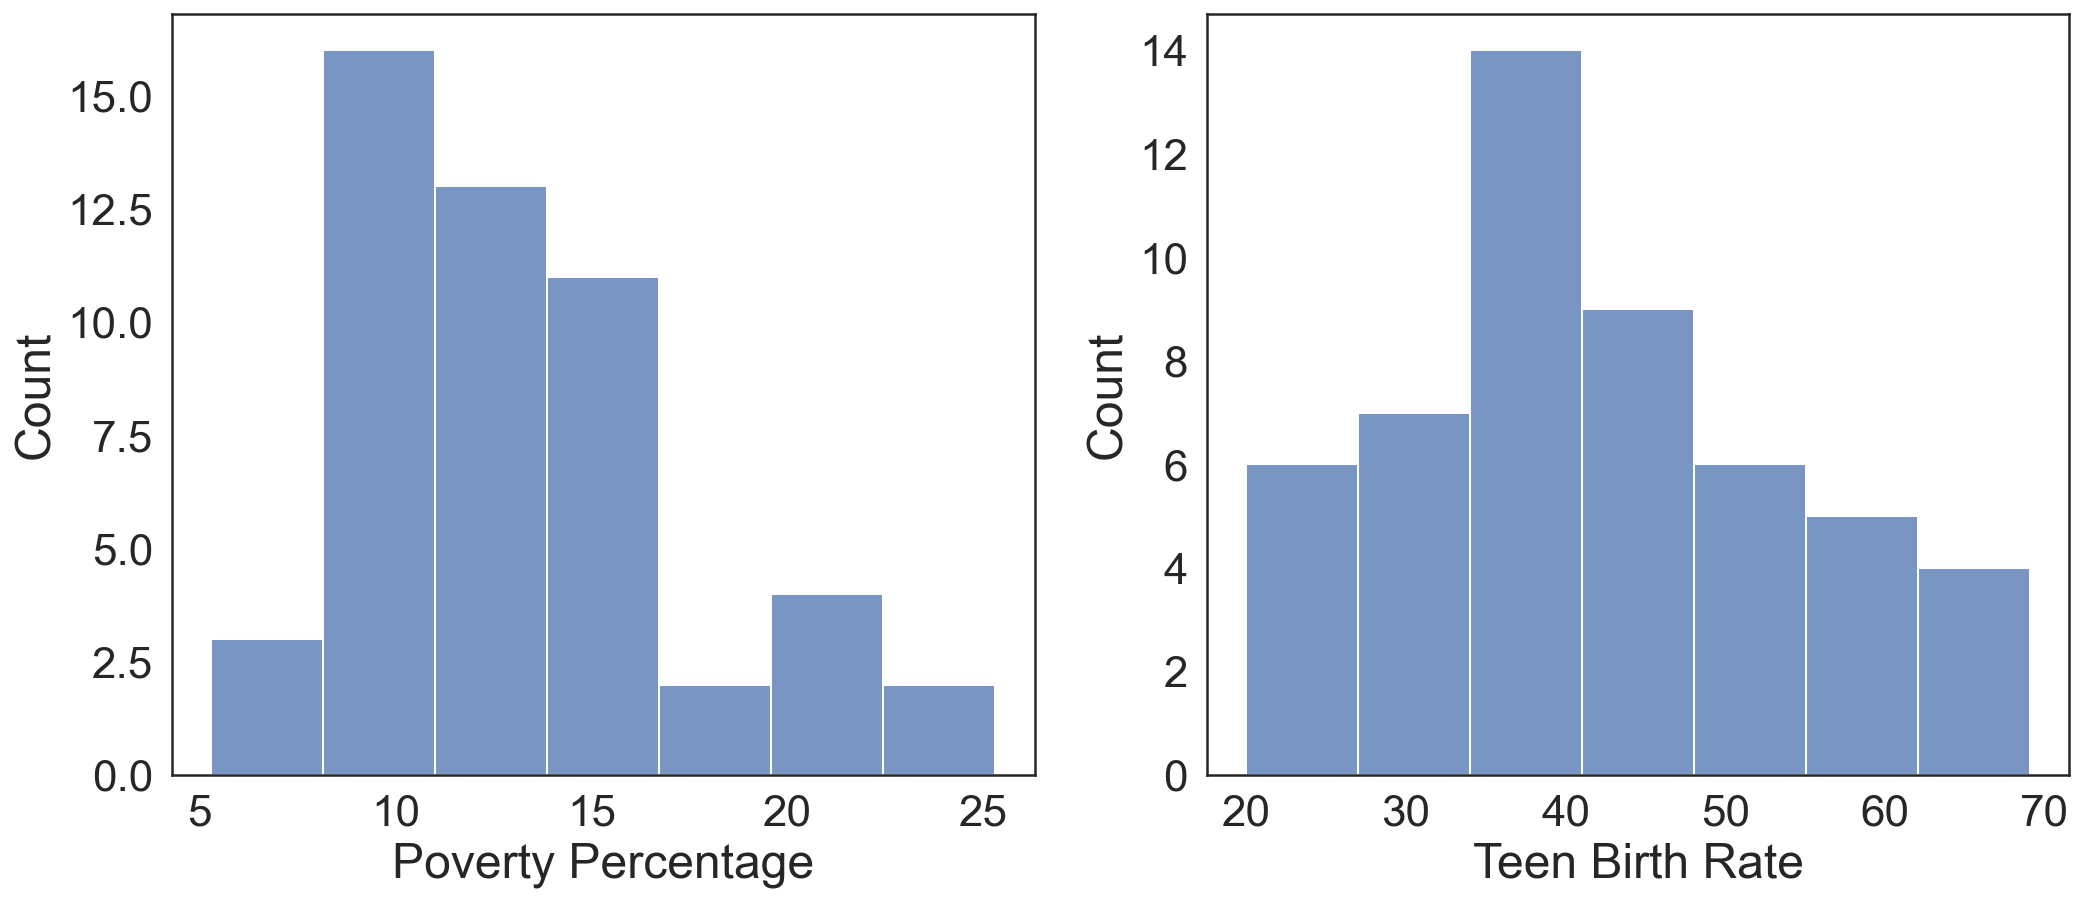

In [4]:
plt.subplot(1, 2, 1)
sns.histplot(df['PovPct'])
plt.xlabel('Poverty Percentage')

plt.subplot(1, 2, 2)
sns.histplot(df['TeenBrth'])
plt.xlabel('Teen Birth Rate');

## Linear Regression

$$outcome = \beta_0 + \beta_1*predictor$$

First, let's be sure we're on the same page about what our outcome is. Here, we're intererested in whether **Poverty Percentage (predictor)** impacts **Teen Birth Rate (outcome)**.

In [5]:
# We can specify our model matrix using `pastsy`.
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct', df)
model = sm.OLS(outcome, predictors)

And, then we just have to fit the model and look at the results.

In [6]:
## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           8.67e-09
Time:                        11:44:47   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

### Clicker Question #2

Which value represents the expected Teen Birth Rate if the Poverty Percentage were 0?

A) 15.67; B) 2.03; C) 4.032; D) 0.495

### Clicker Question #1

What is the effect size of the relationship between Poverty Percentage and Teen Birth Rate?

A) 15.67; B) 2.03; C) 4.032; D) 0.495

There is a lot of information in there. Let's focus on the three pieces we discussed last lecture:

- `coef` : $\beta_1$ estimate explaining the effect size
- `std err` : standard error 
- `P>|t|` : the p-value

## Interpretation

$$outcome = \beta_0 + \beta_1*predictor$$

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

If the Poverty Percentage were 0, the Teen Birth Rate would be **15.67** (The Intercept, $\beta_0$)

For every 1 unit increase in Poverty Percentage, you expect to see a **2.03** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

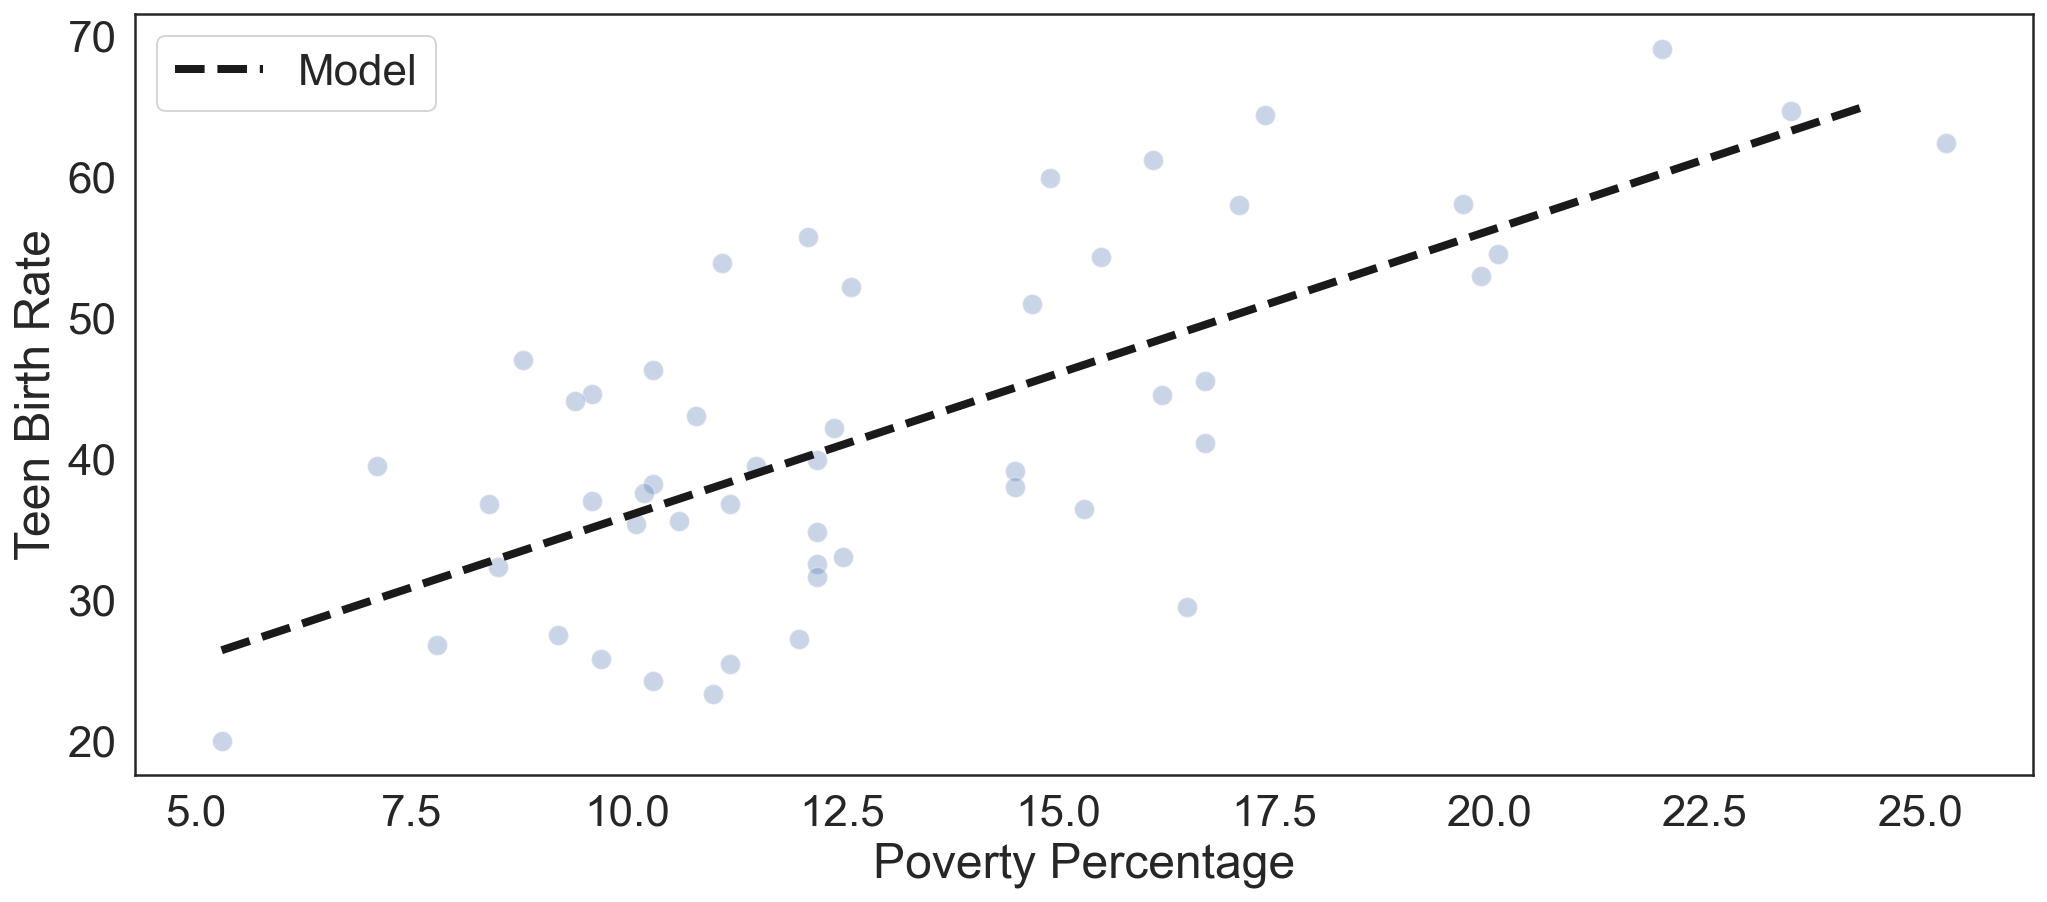

In [7]:
# Plot the orginal data (as before)
sns.scatterplot(x='PovPct', y='TeenBrth', alpha=0.3, data=df, s=100)

# Generate and plot the model fit line
xs = np.arange(df['PovPct'].min(), df['PovPct'].max())
ys = 2.0255 * xs + 15.67
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate')
plt.legend();

The model (the line) mathematically describes the relationship between the data points, but it doesn't explain the relationship *perfectly*. (All models are wrong!)

Note that this line is drawn in the following way:
- if you were to draw a perpendicular line from each point to the line and calculate that distance
- if you were to sum the distance across all points
- this line is the one that minimizes that sum

### Clicker Question #3

If I told you the Poverty Percentage of a state was 15, what would you estimate would be its Teen Birth Rate?

A) ~ 0; B) ~ 30; C) ~ 40; D) ~ 50; E) ~ 60

## Estimates

If I told you a locations' Poverty Percentage, what would you guess its Teen Birth Rate would be?

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

In [8]:
## if Poverty Percentage were 18
birth_rate = 15.67 + 2.03 * 18
birth_rate

52.21

In [9]:
## if Poverty Percentage were 12
birth_rate = 15.67 + 2.03 * 12
birth_rate

40.03

### Clicker Question #5

What is our conclusion from this analysis? (Question: Does Poverty Percentage affect Teen Birth Rate?)

- A) Reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- B) Reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate
- C) Fail to reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- D) Fail to reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate


### Clicker Question #6

How are you doing? 

- A) totally got it
- B) kinda got it
- C) neutral
- D) kinda confused
- E) super confused

## Correlation: Pearson correlation ($r$)

- measures the strength of association between two variables 
- takes values [-1,1]
- as $r$ approaches $|1|$, x and y are highly correlated 

In [10]:
df.corr() #numeric_only=True

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
PovPct,1.000000,0.730293,0.649660,0.469564,0.703285
Brth15to17,0.730293,1.000000,0.942449,0.640274,0.978826
Brth18to19,0.649660,0.942449,1.000000,0.477704,0.988975
ViolCrime,0.469564,0.640274,0.477704,1.000000,0.557937
TeenBrth,0.703285,0.978826,0.988975,0.557937,1.000000


### Clicker Question #7

What is most correlated with Viol Crime?

- A) PovPct
- B) Brth15to17
- C) Brth18to19
- D) TeenBrth

Note that each variable is perfectly correlated with itself (b/c you're comparing the exact same values!)

`TeenBrth` is highly correlated with `Brth15to17` and `Brth18to19`....which makes sense as the latter are subsets of the former. 

Last lecture we saw that `PovPct` plays a role in `TeenBrth`, so it makes sense that these values are somewhat correlated.

### Comparing to linear regression:

$$outcome = \beta_0 + \beta_1*predictor$$

$\beta_1 \approx r $ if ...

- $predictor$ and $outcome$ each have a standard deviation of 1.

# Multiple Linear Regression

So far, we've only been looking at the relationship of one measure (Poverty Percentage) on Teen Birth. 

*But*, Poverty Percentage is likely *not* the only thing that affects Teen Birth Rate.

We could imagine that Violent Crime rates in a location may affect both Poverty Percentage and could possibly affect Teen Birth Rate. (A confounder!)

This is where **multiple linear regression** is incredibly helpful. Multiple linear regression allows you to measure the effect of multiple predictors on an outcome.

In [11]:
df

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1
5,Colorado,8.8,26.2,79.1,5.8,47.0
6,Connecticut,9.7,14.1,45.1,4.6,25.8
7,Delaware,10.3,24.7,77.8,3.5,46.3
8,District_of_Columbia,22.0,44.8,101.5,65.0,69.1
9,Florida,16.2,23.2,78.4,7.3,44.5


In [12]:
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct + ViolCrime', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     30.68
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.61e-09
Time:                        14:10:10   Log-Likelihood:                -178.93
No. Observations:                  51   AIC:                             363.9
Df Residuals:                      48   BIC:                             369.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.6848      3.869      4.571      0.0

$$ Teen Birth = 17.68 + (1.63  * Poverty Percentage) + (0.4 * Violent Crime) $$

If the Poverty Percntage *and* Violent Crime were both 0, the Teen Birth Rate would be **17.68** (The Intercept)

Holding Violent crime constant, for every 1 unit increase in Poverty Percentage, you expect to see a **1.63** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

Holding Poverty Percentage constant, for every 1 unit increase in Violent crime, you'd expect to see a **0.4** unit increase in Teen Birth Rate (The effect size, $\beta_2$)

## No Multiple Colinearity

If we have two predictors, we'll want to consider how similar the values are between predictors (typically, before your generate the model, but we'll do it after for sake of argument today).

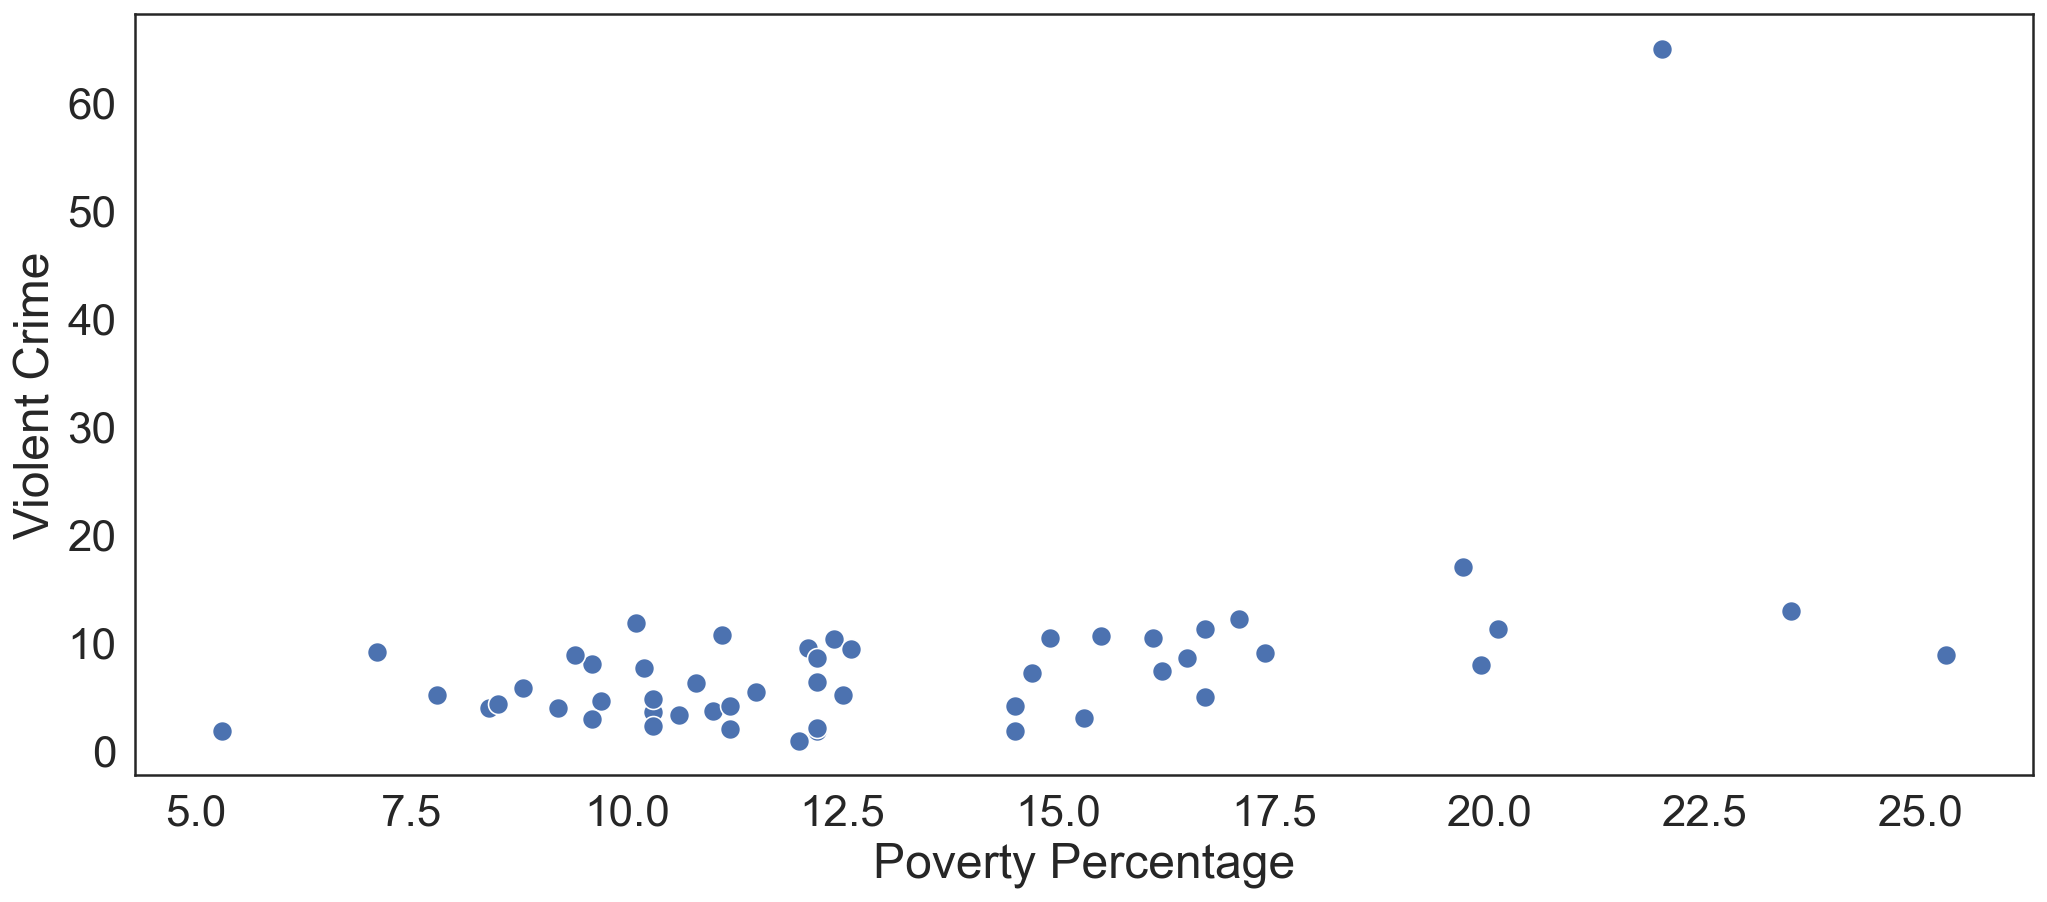

In [13]:
# relationship between predictors
sns.scatterplot(x='PovPct', y='ViolCrime', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime');

In [14]:
df[df['ViolCrime'] > 50]

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
8,District_of_Columbia,22.0,44.8,101.5,65.0,69.1


### Outlier handling

In [15]:
# removing DC
df = df[df['ViolCrime'] < 50]

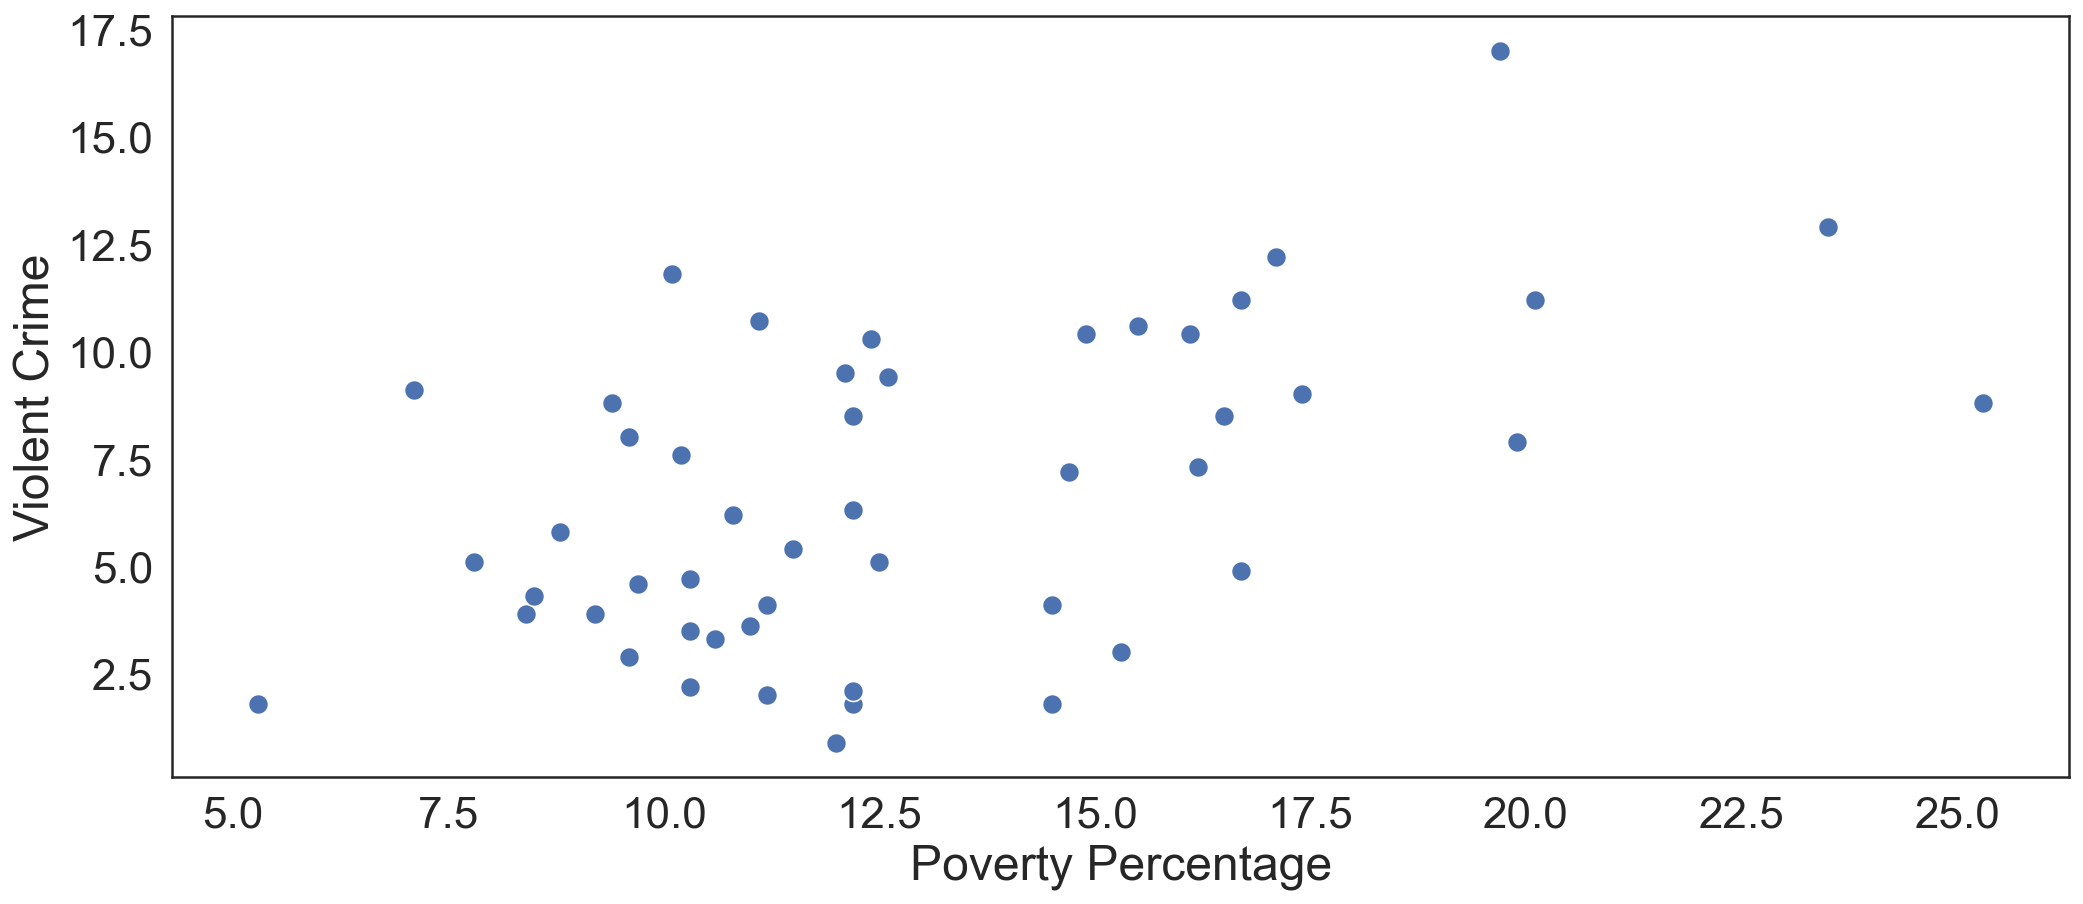

In [16]:
# relationship between predictors
# after removing outlier
sns.scatterplot(x='PovPct', y='ViolCrime', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime');

In [17]:
# run model
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct + ViolCrime', df)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     41.17
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.67e-11
Time:                        14:22:14   Log-Likelihood:                -168.65
No. Observations:                  50   AIC:                             343.3
Df Residuals:                      47   BIC:                             349.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.3419      3.431      4.471      0.0

Holding Violent crime constant, for every 1 unit increase in Poverty Percentage, you expect to see a **1.19** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

Holding Poverty Percentage constant, for every 1 unit increase in Violent crime, you'd expect to see a **1.63** unit increase in Teen Birth Rate (The effect size, $\beta_2$)

Removing the DC outlier led to a different estimate for the effect of violent crime in these data. The inclusion or removal of data in your analyses can affect the results, so it's always important to carefully consider what question you're asking and what data you have (importance of EDA!). 

# Difference in means: t-test

The t-test tests for a difference in means between groups.

Student's t-test assumptions:

- Data are continuous
- Normally distributed
- Large enough sample size
- Equal variance b/w groups


$H_0: \bar x = \bar y$

$H_a: \bar x \ne \bar y$

In [18]:
#binarize viol crime
df['Violent'] = df['ViolCrime'].apply(lambda x: 0 if x < 6.7 else 1)

In [19]:
df

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth,Violent
0,Alabama,20.1,31.5,88.7,11.2,54.5,1
1,Alaska,7.1,18.9,73.7,9.1,39.5,1
2,Arizona,16.1,35.0,102.5,10.4,61.2,1
3,Arkansas,14.9,31.6,101.7,10.4,59.9,1
4,California,16.7,22.6,69.1,11.2,41.1,1
5,Colorado,8.8,26.2,79.1,5.8,47.0,0
6,Connecticut,9.7,14.1,45.1,4.6,25.8,0
7,Delaware,10.3,24.7,77.8,3.5,46.3,0
9,Florida,16.2,23.2,78.4,7.3,44.5,1
10,Georgia,12.1,31.4,92.8,9.5,55.7,1


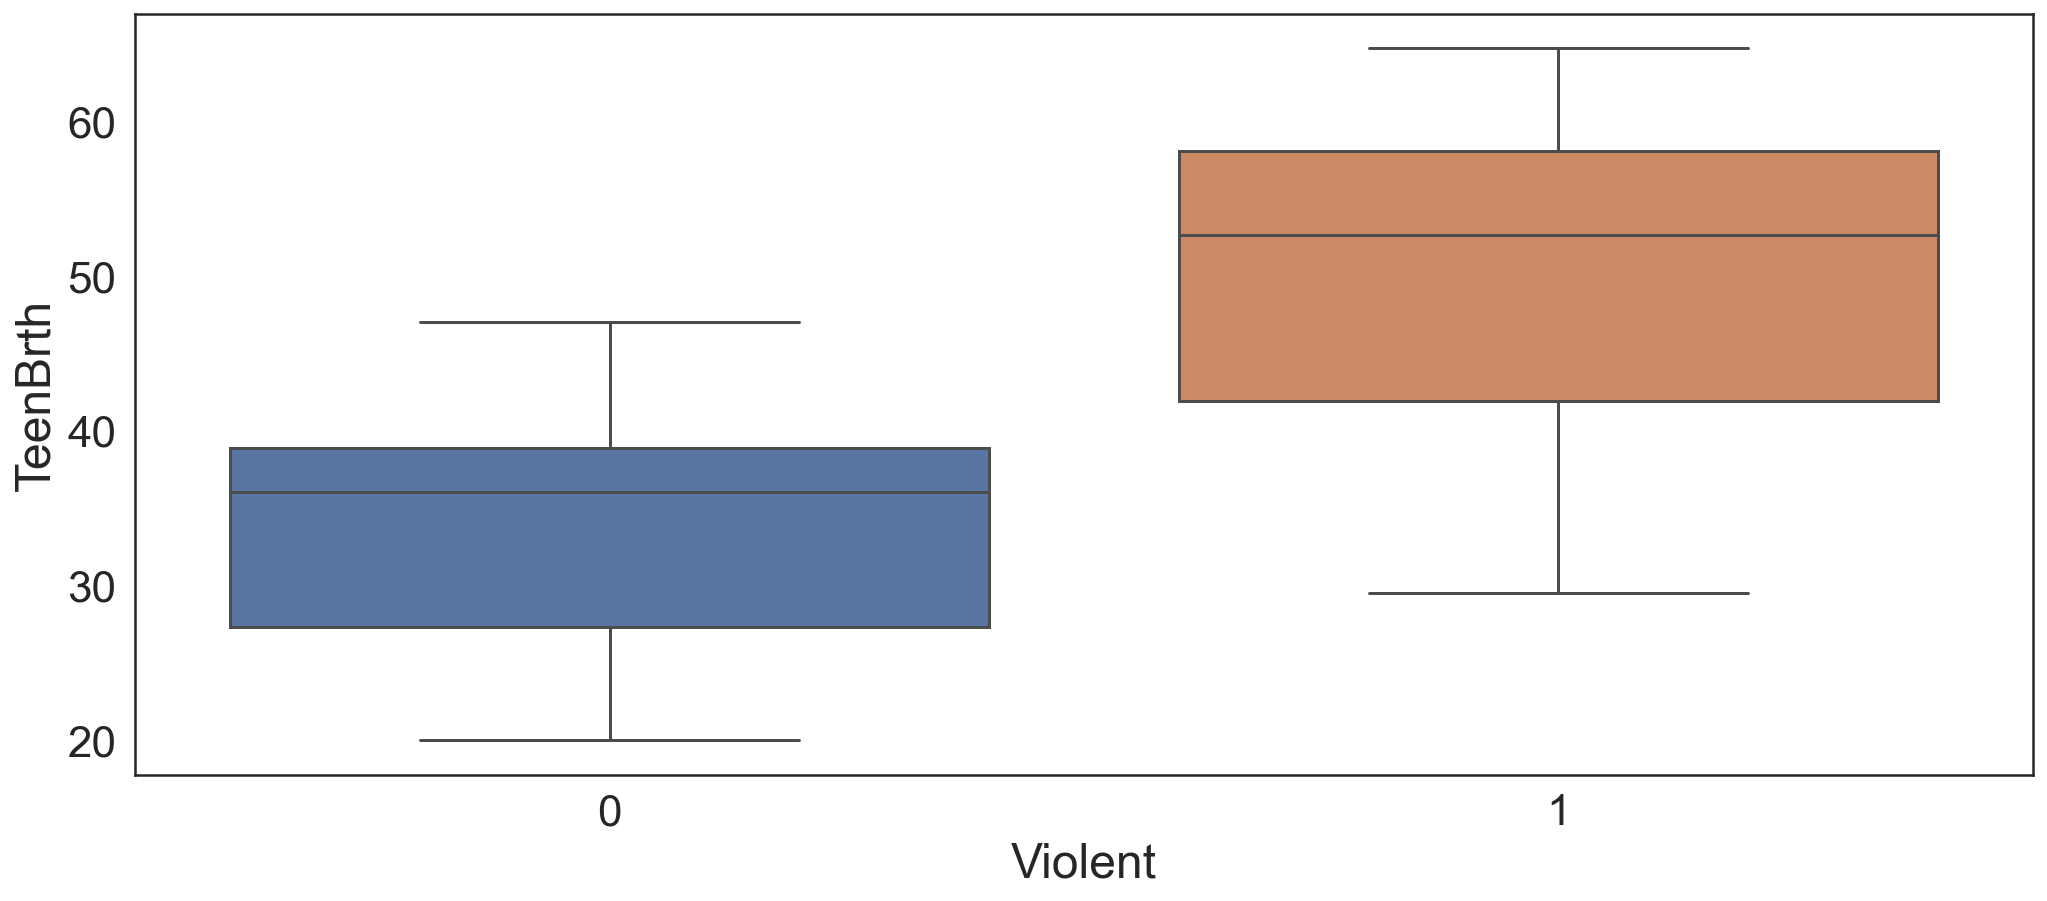

In [20]:
sns.boxplot(x='Violent', y='TeenBrth', data=df);

In [21]:
df.groupby(['Violent'])['TeenBrth'].mean()

Violent
0    34.180769
1    49.858333
Name: TeenBrth, dtype: float64

$H_0: \bar x_{ViolentTeenBirthRate} = \bar y_{NotViolentTeenBirthRate}$

$H_a: \bar x_{ViolentTeenBirthRate} \ne \bar y_{NotViolentTeenBirthRate}$

In [22]:
group1 = df.where(df.Violent==0).dropna()['TeenBrth']
group2 = df.where(df.Violent==1).dropna()['TeenBrth']

In [23]:
ttest_ind(group1, group2)

Ttest_indResult(statistic=-6.2376618103862, pvalue=1.0857382816884421e-07)

The p-value here is $1.08\times 10^{-7}$ ...which means that observing this difference in means due to random chance alone is very unlikely. 

We reject the null in favor of the alternative hypothesis, concluding that the means between the groups are not the same and that violence plays a role on Teen Birth Rate.

### Clicker Question #8

To understand the relationship between height and gender in this classroom, what would you use?

- A) linear regression
- B) correlation
- C) t-test
- D) something else